In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
import missingno as msno
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Importing and Organizing the data

In model development all the steps carried out in EDA for data cleaning will be same, however we will take 1,2,3,4,5 years and these are merged together.

In [2]:
dataset_1 = arff.loadarff('./Datasets/1year.arff')
dataset_2 = arff.loadarff('./Datasets/2year.arff')
dataset_3 = arff.loadarff('./Datasets/3year.arff')
dataset_4 = arff.loadarff('./Datasets/4year.arff')
dataset_5 = arff.loadarff('./Datasets/5year.arff')

In [3]:
#Training dataset
df1 = pd.DataFrame(dataset_1[0])
df2 = pd.DataFrame(dataset_2[0])
df3 = pd.DataFrame(dataset_3[0])
df5 = pd.DataFrame(dataset_5[0])
df4 = pd.DataFrame(dataset_4[0])

In [4]:
df = pd.concat([df1,df2,df3,df4,df5],axis = 0)

In [5]:
print("{0} Rows and {1} columns for dataset".format(df.shape[0],df.shape[1]))

43405 Rows and 65 columns for dataset


In [6]:
#Top five records in the data
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


In [7]:
df.tail()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
5905,0.012898,0.70621,0.038857,1.17220,-18.907,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,b'1'
5906,-0.578050,0.96702,-0.800850,0.16576,-67.365,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,b'1'
5907,-0.179050,1.25530,-0.275990,0.74554,-120.440,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,b'1'
5908,-0.108860,0.74394,0.015449,1.08780,-17.003,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,b'1'
5909,-0.105370,0.53629,-0.045578,0.91478,-56.068,-0.10537,-0.109940,0.86460,0.95040,0.463670,...,-0.052186,-0.227250,1.05220,0.003196,7.7332,4.7174,136.850,2.6672,2.79270,b'1'


In [8]:
#Checking the Datatype of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43405 entries, 0 to 5909
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   43397 non-null  float64
 1   Attr2   43397 non-null  float64
 2   Attr3   43397 non-null  float64
 3   Attr4   43271 non-null  float64
 4   Attr5   43316 non-null  float64
 5   Attr6   43397 non-null  float64
 6   Attr7   43397 non-null  float64
 7   Attr8   43311 non-null  float64
 8   Attr9   43396 non-null  float64
 9   Attr10  43397 non-null  float64
 10  Attr11  43361 non-null  float64
 11  Attr12  43271 non-null  float64
 12  Attr13  43278 non-null  float64
 13  Attr14  43397 non-null  float64
 14  Attr15  43369 non-null  float64
 15  Attr16  43310 non-null  float64
 16  Attr17  43311 non-null  float64
 17  Attr18  43397 non-null  float64
 18  Attr19  43277 non-null  float64
 19  Attr20  43278 non-null  float64
 20  Attr21  37551 non-null  float64
 21  Attr22  43397 non-null  float64
 22 

In [9]:
df.corr()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
Attr1,1.000000,-0.104146,0.058037,0.000855,0.002742,0.315139,0.408428,0.000184,-0.225720,-0.240254,...,0.004014,0.000044,0.007764,-0.000302,-0.000220,0.000213,0.000582,0.000325,0.008387,-0.069029
Attr2,-0.104146,1.000000,-0.926983,-0.001589,-0.036344,-0.842916,0.102020,-0.002385,-0.016594,-0.409341,...,-0.009580,-0.000235,-0.000793,0.000270,0.000617,-0.000078,-0.001191,0.046871,-0.003339,-0.015649
Attr3,0.058037,-0.926983,1.000000,0.002335,0.038900,0.760215,0.033521,0.001267,-0.002981,0.369558,...,0.011101,0.000017,0.000779,-0.000034,-0.000247,0.000377,-0.000139,-0.050162,0.004044,-0.000909
Attr4,0.000855,-0.001589,0.002335,1.000000,0.001852,0.000050,0.000167,0.598635,-0.000392,0.001668,...,-0.000078,0.000281,0.000125,-0.000289,-0.000266,0.001671,0.004387,-0.000704,0.039447,0.000122
Attr5,0.002742,-0.036344,0.038900,0.001852,1.000000,0.029307,0.001491,0.001631,0.000796,0.014709,...,0.001535,-0.000031,-0.000009,0.000029,0.000067,0.000087,0.000007,-0.002639,0.000690,0.000198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Attr60,0.000213,-0.000078,0.000377,0.001671,0.000087,-0.000070,0.054043,0.000114,0.076701,-0.000206,...,-0.001078,0.000070,-0.000685,-0.000070,0.000569,1.000000,0.033671,-0.000098,0.101587,0.014150
Attr61,0.000582,-0.001191,-0.000139,0.004387,0.000007,0.000319,0.084975,0.003879,0.115765,0.021728,...,-0.001837,0.000153,0.000360,-0.000169,-0.000218,0.033671,1.000000,-0.000315,0.109143,0.147088
Attr62,0.000325,0.046871,-0.050162,-0.000704,-0.002639,-0.039735,0.000059,-0.000260,-0.000435,-0.018828,...,-0.002787,-0.864130,-0.000012,0.863849,0.000030,-0.000098,-0.000315,1.000000,-0.000793,-0.000272
Attr63,0.008387,-0.003339,0.004044,0.039447,0.000690,0.000825,0.709315,0.038943,0.933967,0.004136,...,0.000290,0.000372,0.001252,-0.000411,-0.000594,0.101587,0.109143,-0.000793,1.000000,0.277732


In [10]:
df.shape

(43405, 65)

In [11]:
df.dtypes

Attr1     float64
Attr2     float64
Attr3     float64
Attr4     float64
Attr5     float64
           ...   
Attr61    float64
Attr62    float64
Attr63    float64
Attr64    float64
class      object
Length: 65, dtype: object

In [12]:
from sklearn.preprocessing import LabelEncoder
# Assuming 'df' contains 'class' column
label_encoder = LabelEncoder()

# Convert class labels to integers
df['class'] = label_encoder.fit_transform(df['class'])

In [13]:
df['class'].value_counts()

0    41314
1     2091
Name: class, dtype: int64

In [14]:
df

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,0
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,0
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,0
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,0
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,1
5906,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,1
5907,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,1
5908,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,1


We can see that the CLASS feature is of Object-Type which means it is probably in String format. We will first check the unique values in that series then replace them with either 0 or 1

In [15]:
#Listing the names of all features
data_keys=list(df.columns)
len(data_keys)

65

In [16]:
#Checking the unique values in the Class-Feature
df['class'].unique()

array([0, 1])

In [17]:
df['class'].value_counts()

0    41314
1     2091
Name: class, dtype: int64

<Figure size 2200x300 with 0 Axes>

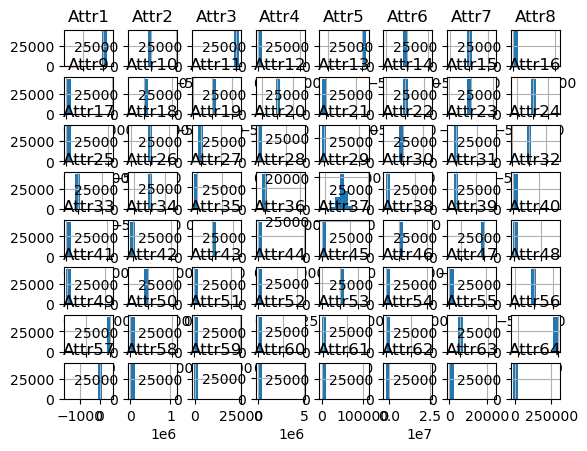

In [18]:
# Assuming 'df' is your DataFrame
freqgraph = df.select_dtypes(include=['float'])

# Set the size of the plots
plt.figure(figsize=(22, 3))

# Create histograms for the selected columns
freqgraph.hist()

# Display the plots
plt.show()


In [19]:
df['class'].dtype #The datatype for the CLASS-Feature is now converted into INT type.

dtype('int32')

In [20]:
df['class'].value_counts()

0    41314
1     2091
Name: class, dtype: int64

<AxesSubplot:title={'center':'Distribution of Class Labels in Data'}>

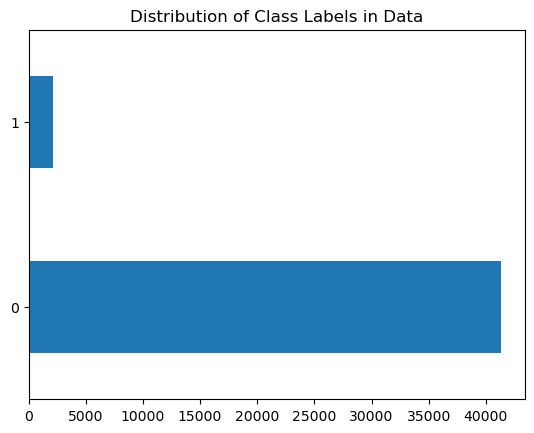

In [21]:
plt.title('Distribution of Class Labels in Data')
df['class'].value_counts().plot(kind = 'barh')

Missing Values Solving

In [22]:
df.isna().sum()

Attr1       8
Attr2       8
Attr3       8
Attr4     134
Attr5      89
         ... 
Attr61    102
Attr62    127
Attr63    134
Attr64    812
class       0
Length: 65, dtype: int64

In [23]:
total_cells= np.product(df.shape)
total_missing=df.isnull().sum().sum()
# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing,'percent')

1.4646309801245867 percent


Text(0.5, 1.0, 'Missing values in Dataset')

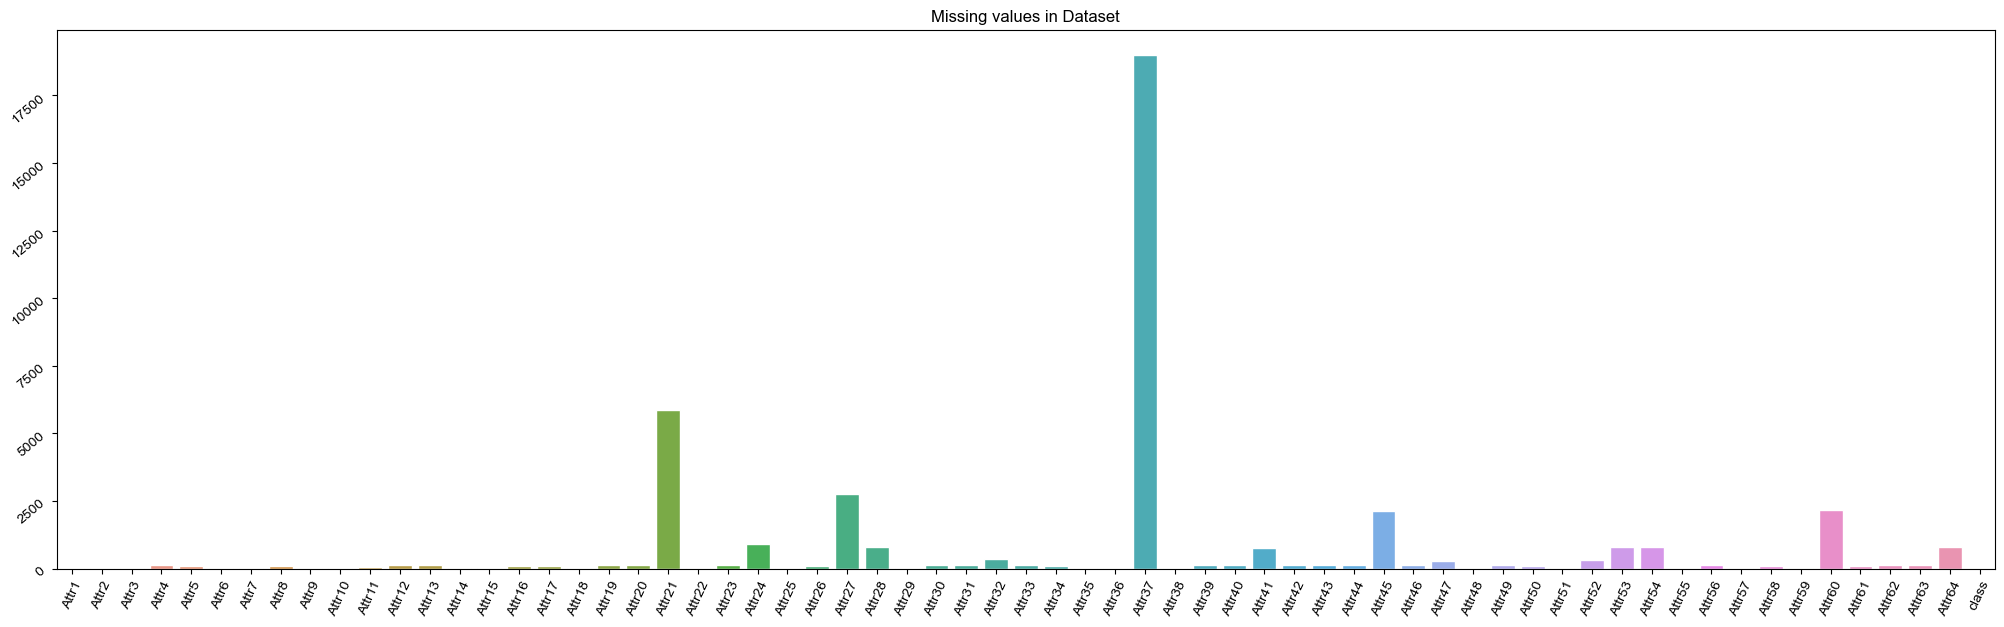

In [24]:
plt.figure(figsize = (25,7))
plt.xticks(rotation=65)
plt.yticks(rotation=40)
sns.set_theme(style = "ticks", palette = "pastel")
sns.barplot(x = df.columns,y = df.isna().sum().values)
plt.title("Missing values in Dataset")

<Figure size 5000x6000 with 0 Axes>

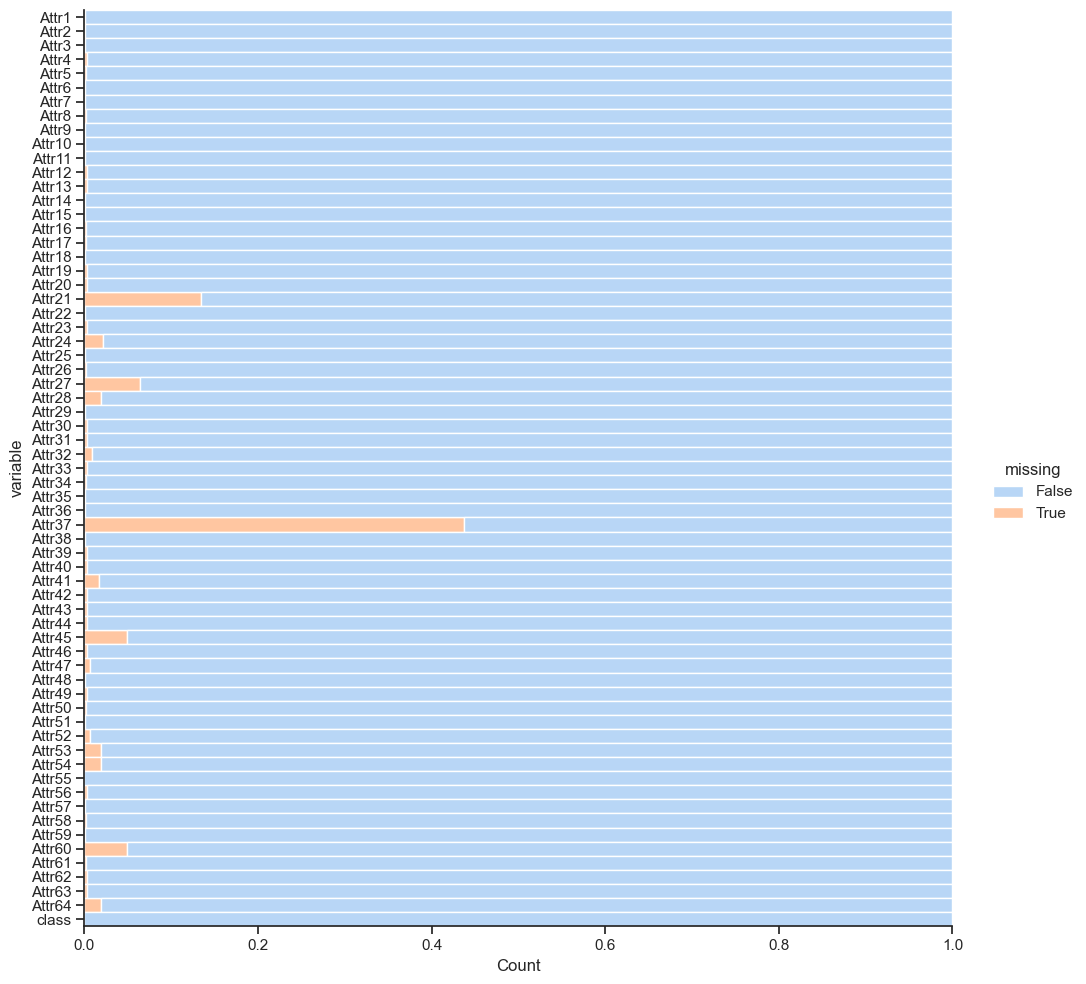

In [25]:
plt.figure(figsize=(50,60))
pltmv=sns.displot(data=df.isna().melt(value_name="missing"),
            y="variable",hue="missing",
            multiple="fill",height=10,aspect=1)
plt.savefig("visualizing_missing_data_with_barplot.png", dpi=100)

Text(0.5, 1.0, 'Missing values in Dataset')

<Figure size 5000x6000 with 0 Axes>

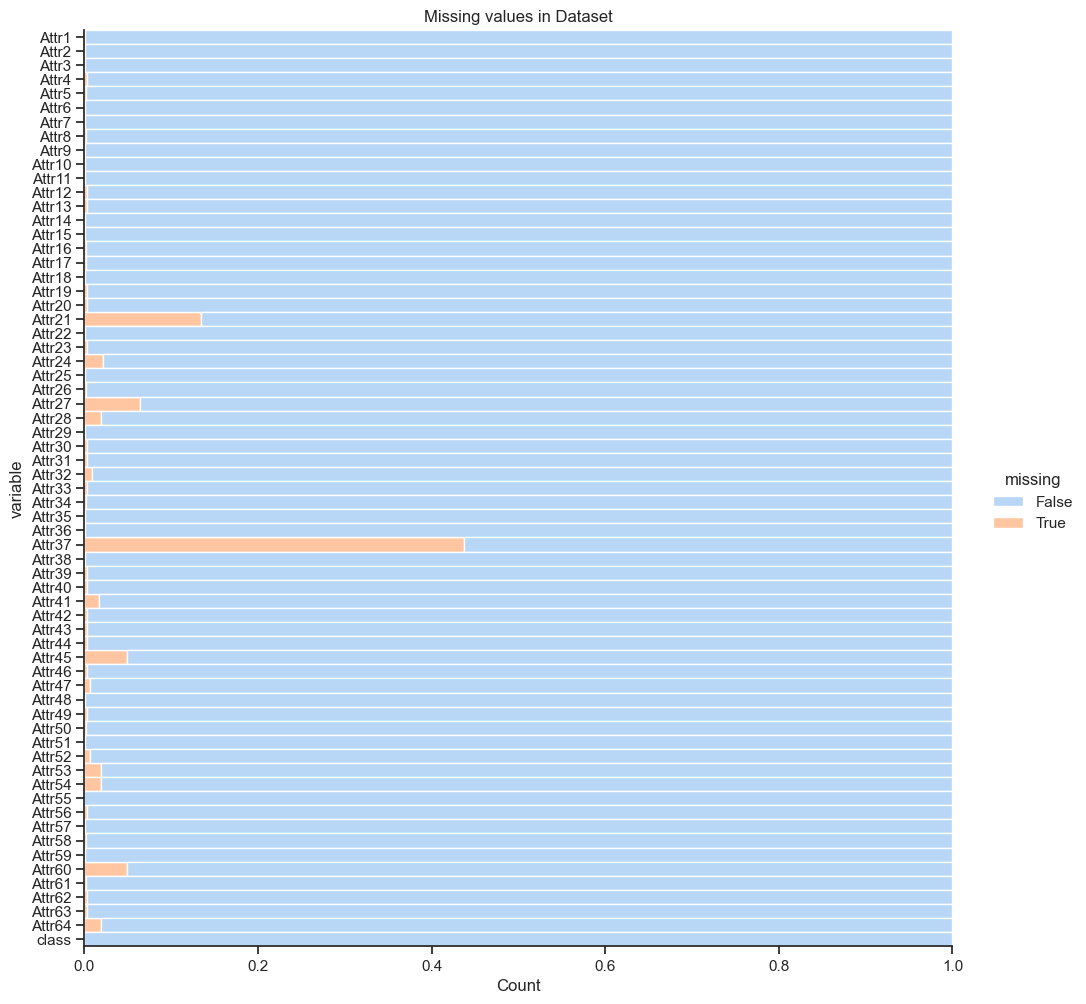

In [26]:
plt.figure(figsize=(50,60))
pltmv=sns.displot(data=df.isna().melt(value_name="missing"),
            y="variable",hue="missing",
            multiple="fill",height=10,aspect=1)
plt.savefig("visualizing_missing_data_with_barplot.png", dpi=100)
plt.title("Missing values in Dataset")

As we can see there are plethora of missing values in our dataset. We can use bfill, ffill, mean, mode or median for filling the missing values using fillna() method.

Text(0.5, 1.0, 'Missing data distribution')

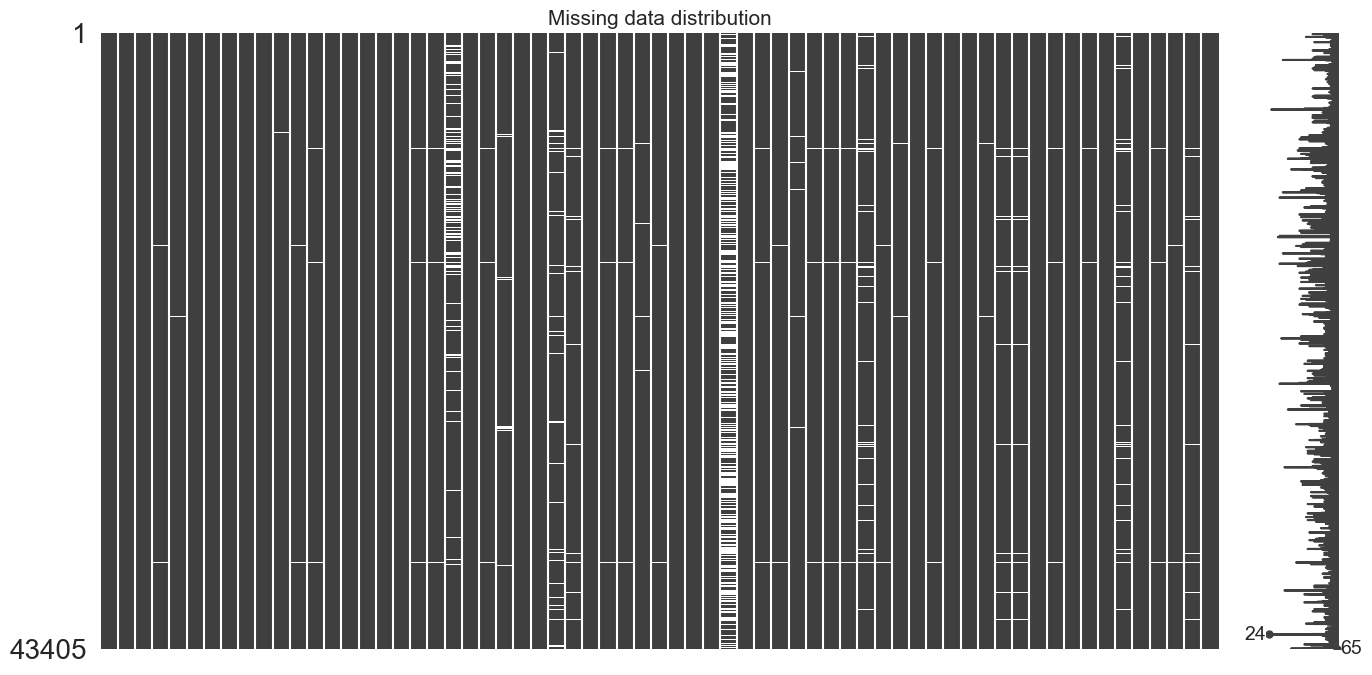

In [27]:
msno.matrix(df, figsize=(16,8))
plt.title("Missing data distribution", size=15)

<AxesSubplot:>

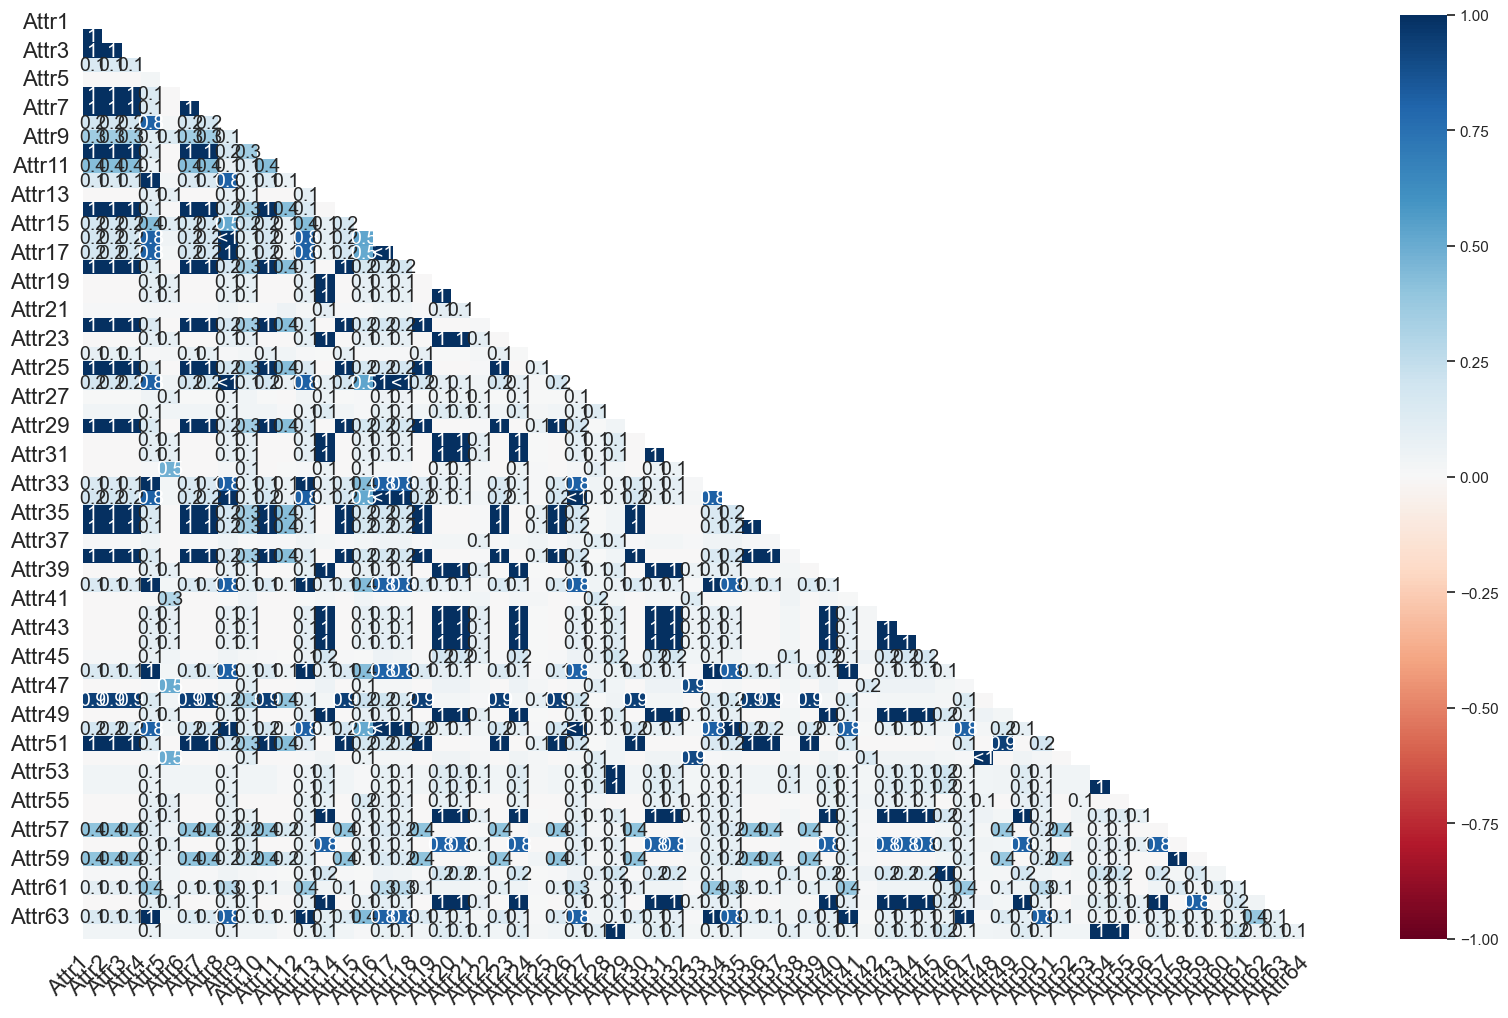

In [28]:
msno.heatmap(df)

In [29]:
df.isna().sum()

Attr1       8
Attr2       8
Attr3       8
Attr4     134
Attr5      89
         ... 
Attr61    102
Attr62    127
Attr63    134
Attr64    812
class       0
Length: 65, dtype: int64

In [30]:
# Assuming 'df_train' is your DataFrame containing the columns 'Attr1' to 'Attr64'

for i in range(1, 65):  # Assuming the columns are named from 'Attr1' to 'Attr64'
    col_name = f'Attr{i}'
    df[col_name] = df[col_name].fillna(df[col_name].mode().iloc[0])

In [31]:
df.isna().sum()

Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
         ..
Attr61    0
Attr62    0
Attr63    0
Attr64    0
class     0
Length: 65, dtype: int64

In [32]:
column_names = [
'net profit / total assets',
'total liabilities / total assets',
'working capital / total assets',
'current assets / short-term liabilities',
'[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] 365',
'retained earnings / total assets',
'EBIT / total assets',
'book value of equity / total liabilities',
'sales / total assets',
'equity / total assets',
'(gross profit + extraordinary items + financial expenses) / total assets',
'gross profit / short-term liabilities',
'(gross profit + depreciation) / sales',
'(gross profit + interest) / total assets',
'(total liabilities 365) / (gross profit + depreciation)',
'(gross profit + depreciation) / total liabilities',
'total assets / total liabilities',
'gross profit / total assets',
'gross profit / sales',
'(inventory 365) / sales',
'sales (n) / sales (n-1)',
'profit on operating activities / total assets',
'net profit / sales',
'gross profit (in 3 years) / total assets',
'(equity - share capital) / total assets',
'(net profit + depreciation) / total liabilities',
'profit on operating activities / financial expenses',
'working capital / fixed assets',
'logarithm of total assets',
'(total liabilities - cash) / sales',
'(gross profit + interest) / sales',
'(current liabilities 365) / cost of products sold',
'operating expenses / short-term liabilities',
'operating expenses / total liabilities',
'profit on sales / total assets',
'total sales / total assets',
'(current assets - inventories) / long-term liabilities',
'constant capital / total assets',
'profit on sales / sales',
'(current assets - inventory - receivables) / short-term liabilities',
'total liabilities / ((profit on operating activities + depreciation) (12/365))',
'profit on operating activities / sales',
'rotation receivables + inventory turnover in days',
'(receivables 365) / sales',
'net profit / inventory',
'(current assets - inventory) / short-term liabilities',
'(inventory 365) / cost of products sold',
'EBITDA (profit on operating activities - depreciation) / total assets',
'EBITDA (profit on operating activities - depreciation) / sales',
'current assets / total liabilities',
'short-term liabilities / total assets',
'(short-term liabilities 365) / cost of products sold)',
'equity / fixed assets',
'constant capital / fixed assets',
'working capital',
'(sales - cost of products sold) / sales',
'(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)',
'total costs /total sales',
'long-term liabilities / equity',
'sales / inventory',
'sales / receivables',
'(short-term liabilities *365) / sales',
'sales / short-term liabilities',
'sales / fixed assets',
'class'
]

df.columns = column_names

In [33]:
df

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,class
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,0
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,0
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,0
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,0
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,1
5906,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,1
5907,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,1
5908,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,1


Data Imputation

In [34]:
def meanImpute(feature):
    avg = df[feature].mean()
    return avg

In [35]:
for feature in df.columns:
    impute_avg = meanImpute(feature)
    df[feature].fillna(impute_avg,inplace = True)

In [36]:
print('Missing values in data',df.isna().any().sum()) ##There are no Missing values

Missing values in data 0


Mean Imputation

In [37]:
def meanImpute(feature):
    avg = df[feature].mean()
    return avg

# Assuming 'df' is your DataFrame
for feature in df.columns:
    impute_avg = meanImpute(feature)
    df[feature].fillna(impute_avg, inplace=True)

In [38]:
print('Missing values in data',df.isna().any().sum()) ##There are no Missing values

Missing values in data 0


As you can see we dealt with missing values and there are no missing values in our dataset now. We will move forward and check whether our dataset is balanced or not

Dealing with Imabalance Data

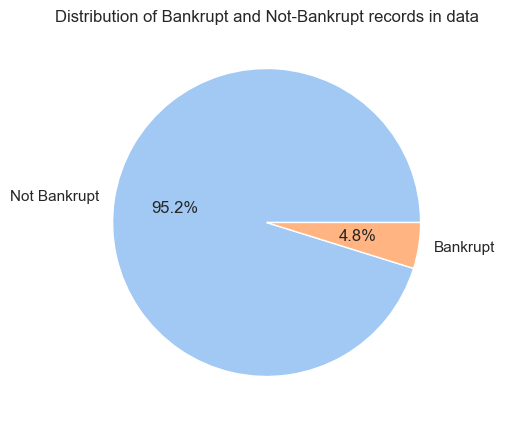

In [39]:
plt.figure(figsize = (7,5))
labels = ["Not Bankrupt", "Bankrupt"]
plt.pie(df['class'].value_counts().values,labels = labels, autopct='%.1f%%')
plt.title("Distribution of Bankrupt and Not-Bankrupt records in data")
plt.show()


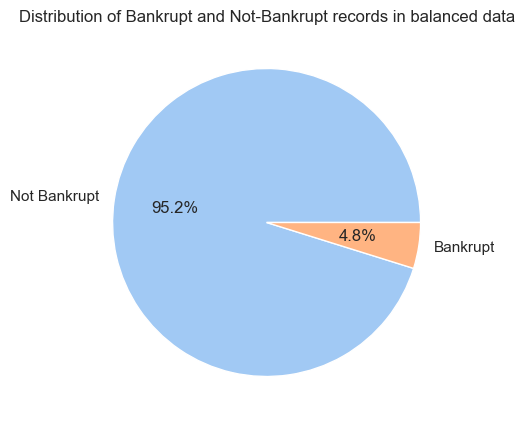

In [40]:
from imblearn.over_sampling import RandomOverSampler

import matplotlib.pyplot as plt

# Assuming 'balanced_df' is your balanced DataFrame
plt.figure(figsize=(7, 5))
labels = ["Not Bankrupt", "Bankrupt"]
plt.pie(df['class'].value_counts().values, labels=labels, autopct='%.1f%%')
plt.title("Distribution of Bankrupt and Not-Bankrupt records in balanced data")
plt.show()

It can be clearly seen from the pie chart that the dataset is imbalanced. So we will now apply SMOTE for oversampling of data values.

In [41]:
X = df.drop(columns = 'class')
y = df[['class']]

In [42]:
from imblearn.over_sampling import SMOTE

In [43]:
oversample = SMOTE()

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert class labels to numeric
y_numeric = label_encoder.fit_transform(y)

In [46]:
# Convert class labels to numeric using replace
y_numeric = y.replace({'Not Bankrupt': 0, 'Bankrupt': 1})


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
# Convert class labels to numeric using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the RandomOverSampler
oversampler = RandomOverSampler(random_state=0)

# Perform oversampling on the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [49]:
X_train, y_train = oversample.fit_resample(X_train,y_train)

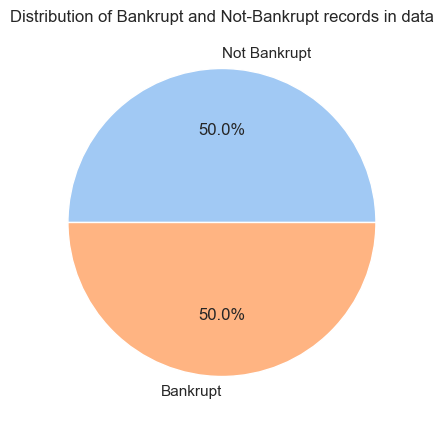

In [50]:
plt.figure(figsize = (7,5))
labels = ["Not Bankrupt", "Bankrupt"]

plt.pie(pd.DataFrame(y_train).value_counts(),labels = labels, autopct='%.1f%%')
plt.title("Distribution of Bankrupt and Not-Bankrupt records in data")
plt.show()
plt.show()

In [51]:
df

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,class
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,0
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,0
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,0
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,0
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,1
5906,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,1
5907,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,1
5908,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,1


The dataset is balanced now at the ratio of 50: 50

FEATURE ENGINEERING STEPS

Feature engineering involves creating new features or modifying existing ones to improve the performance of your machine learning model. Given that your dataset contains financial ratios, you might want to consider creating additional relevant features

Train Test Split

In [52]:
X = df.drop(columns=['class'])
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardization

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
X_train_scaled

array([[-0.02701849, -0.02397669,  0.01929929, ..., -0.00864181,
        -0.04427666, -0.03303591],
       [-0.0486087 ,  0.04949835, -0.0297952 , ..., -0.0086541 ,
        -0.04380443, -0.02722642],
       [-0.04124169,  0.05081532, -0.01305334, ..., -0.00839055,
        -0.0513124 , -0.02096404],
       ...,
       [ 0.13120822, -0.01664313,  0.01567425, ..., -0.00916884,
         0.03119501, -0.03314286],
       [-0.003482  ,  0.01771063, -0.03796456, ..., -0.0086582 ,
        -0.04364248, -0.03345492],
       [ 0.01207534, -0.07627303,  0.07675366, ..., -0.00919855,
         0.05031872, -0.0313043 ]])

Functions for each feature selection method

Method 1: PCA

In [54]:
from sklearn.decomposition import PCA
def apply_pca(X_train, X_test, num_components):
    pca = PCA(n_components=num_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_test_pca

Method 2: Mutual Information Analysis

In [55]:
def apply_mutual_information(X_train, X_test, num_features):
    mi_scores = mutual_info_regression(X_train, y_train)
    selected_features_indices = mi_scores.argsort()[::-1][:num_features]
    X_train_mi = X_train[:, selected_features_indices]
    X_test_mi = X_test[:, selected_features_indices]
    return X_train_mi, X_test_mi

Method 3: Pearson Correlation Coefficient

In [56]:
def apply_pearson_correlation(X_train, X_test, correlation_threshold):
    correlation_matrix = pd.DataFrame(X_train).corr()
    highly_correlated_pairs = {}
    for col in correlation_matrix.columns:
        correlated_cols = correlation_matrix.index[correlation_matrix[col] > correlation_threshold].tolist()
        correlated_cols.remove(col)
        highly_correlated_pairs[col] = correlated_cols
    columns_to_retain = set(range(X_train.shape[1]))
    for _, correlated_cols in highly_correlated_pairs.items():
        columns_to_retain.difference_update(correlated_cols)
    selected_features = list(columns_to_retain)
    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]
    return X_train_selected, X_test_selected

Defining model

In [57]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [58]:
# Methods and parameters
methods = {
    'PCA': (apply_pca, {'num_components': 35}),
    'Mutual Information': (apply_mutual_information, {'num_features': 35}),
    'Pearson Correlation': (apply_pearson_correlation, {'correlation_threshold': 0.6}),
}

In [59]:
from sklearn.metrics import mean_squared_error
# Applying methods
for method, (apply_method, params) in methods.items():
    X_train_method, X_test_method = apply_method(X_train_scaled, X_test_scaled, **params)
    model.fit(X_train_method, y_train)
    y_pred = model.predict(X_test_method)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{method} Mean Squared Error (MSE): {mse}")

PCA Mean Squared Error (MSE): 0.04833700895542103
Mutual Information Mean Squared Error (MSE): 0.048548904319281286
Pearson Correlation Mean Squared Error (MSE): 0.048423328963608646


Creating a dataset w.r.t Principal Component Analysis

Creating dataset w.r.t Pearson correlation matrix

In [60]:
'(total liabilities\xa0365) / (gross profit + depreciation)' in df.columns

False

In [61]:
features=['short-term liabilities / total assets',
 'retained earnings / total assets',
 'net profit / total assets',
 '(equity - share capital) / total assets',
 'profit on sales / sales',
 'profit on sales / total assets',
 '(gross profit + extraordinary items + financial expenses) / total assets',
 'profit on operating activities / total assets',
 'constant capital / total assets',
 'gross profit (in 3 years) / total assets',
 '(total liabilities\xa0365) / (gross profit + depreciation)',
 'profit on operating activities / financial expenses',
 'sales (n) / sales (n-1)',
 '(current assets - inventory) / short-term liabilities',
 'total costs /total sales',
 'logarithm of total assets',
 'total liabilities / total assets',
 'working capital / total assets','class']

features.append('(total liabilities 365) / (gross profit + depreciation)')
features.remove('(total liabilities\xa0365) / (gross profit + depreciation)')

In [62]:
df2=df[features]

In [63]:
from sklearn.model_selection import train_test_split
X = df2.copy()
y = X.pop("class")

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

array([[-0.04654308,  0.04330648,  0.01917026, ..., -0.04329898,
         0.00184505, -0.01065273],
       [ 0.00371638,  0.03546428,  0.01355964, ...,  0.00861609,
        -0.02510153,  0.06038798],
       [-0.0406665 ,  0.03537441,  0.02976323, ..., -0.04465909,
         0.01876259, -0.00975973],
       ...,
       [-0.00947477,  0.03809302,  0.02382752, ...,  0.00038986,
        -0.00286305, -0.00868137],
       [-0.01489836,  0.04530899,  0.03726131, ..., -0.0312161 ,
         0.04930875, -0.02024013],
       [ 0.02110281,  0.02870492,  0.05252788, ...,  0.00348092,
         0.03277471, -0.01576668]])

In [64]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Create a SMOTE and RandomUnderSampler pipeline
over_sampler = SMOTE(sampling_strategy=0.5)  # Adjust the sampling_strategy as needed
under_sampler = RandomUnderSampler(sampling_strategy=1.0)  # Adjust the sampling_strategy as needed

# Combine them into a single pipeline
resampling_pipeline = Pipeline([
    ('oversample', over_sampler),
    ('undersample', under_sampler)
])

# Apply the pipeline to balance the data
X, y = resampling_pipeline.fit_resample(X, y)

In [65]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your training data and transform it
X_train2 = scaler.fit_transform(X_train2)

# Transform your test or validation data using the same scaler
X_test2 = scaler.transform(X_test2)

In [66]:
X_train2

,short-term liabilities / total assets,retained earnings / total assets,net profit / total assets,(equity - share capital) / total assets,profit on sales / sales,profit on sales / total assets,(gross profit + extraordinary items + financial expenses) / total assets,profit on operating activities / total assets,constant capital / total assets,gross profit (in 3 years) / total assets,profit on operating activities / financial expenses,sales (n) / sales (n-1),(current assets - inventory) / short-term liabilities,total costs /total sales,logarithm of total assets,total liabilities / total assets,working capital / total assets,(total liabilities 365) / (gross profit + depreciation)
27072,0.381130,-0.012404,-0.012404,0.162830,0.023426,0.035777,0.041576,0.035777,0.566780,0.041576,0.241170,1.000000,1.474600,0.971340,4.435500,0.785080,0.274410,2426.900000
40131,0.014146,-0.160280,0.361870,0.587820,0.020598,0.039167,0.362410,0.000000,0.985850,0.363790,0.000000,1.708600,69.106000,0.005204,2.099000,0.014146,0.985850,4.273000
49692,1.460611,-0.625331,-0.907362,-1.246431,-0.594851,-0.320857,-0.847744,-0.867666,-0.490285,-0.646338,-13.013102,0.868038,0.167989,1.888664,4.534108,1.518229,-1.056669,-694.889135
46573,0.003099,0.028819,-0.077954,0.006080,-0.991685,-0.045949,-0.070965,-0.073300,0.996822,-0.077954,38.248493,1.000000,168.433424,1.095593,3.202251,0.003099,0.551793,4.164447
50403,1.250664,-0.238451,-0.260656,-0.511373,-0.194115,-0.217260,-0.252568,-0.222853,-0.269958,-0.005988,-0.769818,0.859572,-0.003147,0.942300,5.079774,1.361134,-0.857907,-2412.199323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32513,0.236050,0.371580,0.146470,0.743800,0.062319,0.149510,0.146470,0.149510,0.749080,0.371580,0.664560,1.112400,1.338800,0.937750,4.305700,0.241340,0.186560,421.550000
1016,0.219350,0.354770,0.106020,0.770710,0.084537,0.146540,0.137770,0.146540,0.770710,0.447700,0.922620,1.157000,2.140800,0.916270,4.452200,0.219350,0.509760,435.630000
23186,0.514060,0.000000,0.029394,0.136740,0.098735,0.277970,0.166350,0.165590,0.485940,0.205980,1.642000,1.094300,0.539720,0.976990,3.457300,0.706240,-0.109760,1574.500000
34655,0.472840,0.004002,0.002948,0.006948,-0.023865,-0.141410,0.016997,0.016997,0.514230,0.016288,1.209800,0.835400,0.876950,1.029600,2.980300,0.587800,0.181830,2393.600000


In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Create an instance of DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10]
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Train the classifier on the training data
grid_search.fit(X_train2, y_train2)

# Get the best estimator
best_clf = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_clf.predict(X_test2)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test2, y_pred)
conf_matrix = confusion_matrix(y_test2, y_pred)
classification_rep = classification_report(y_test2, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split
X = df2.copy()
y = X.pop("class")

import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Create a SMOTE and RandomUnderSampler pipeline
over_sampler = SMOTE(sampling_strategy=0.5)  # Adjust the sampling_strategy as needed
under_sampler = RandomUnderSampler(sampling_strategy=1.0)  # Adjust the sampling_strategy as needed

# Combine them into a single pipeline
resampling_pipeline = Pipeline([
    ('oversample', over_sampler),
    ('undersample', under_sampler)
])

# Apply the pipeline to balance the data
X, y = resampling_pipeline.fit_resample(X, y)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)


#standarization

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform your test or validation data using the same scaler
X_test = scaler.transform(X_test)  # Replace X_test with your test data

# Now, X_train_scaled and X_test_scaled contain the scaled feature values


In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score

# Assuming you've already loaded and concatenated the data into 'df'

# Split the data into k folds
k = 5  # Using 10-fold cross-validation
folds = KFold(n_splits=k, shuffle=True, random_state=42)

# Define the hyperparameter grid for DecisionTreeClassifier
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10]
}

# Perform K-fold cross-validation for each fold
best_accuracies = []
for train_index, test_index in folds.split(df2):
    train_data = df2.iloc[train_index]
    test_data = df2.iloc[test_index]

    X_train, y_train = train_data.drop("class", axis=1), train_data["class"]
    X_test, y_test = test_data.drop("class", axis=1), test_data["class"]

    # Create an instance of DecisionTreeClassifier
    clf = DecisionTreeClassifier(random_state=42)

    # Create an instance of GridSearchCV
    grid_search = GridSearchCV(clf, param_grid, cv=5)  # Using 5-fold CV for hyperparameter tuning

    # Train the classifier on the training data
    grid_search.fit(X_train, y_train)

    # Get the best estimator
    best_clf = grid_search.best_estimator_

    # Make predictions on the test data
    y_pred = best_clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    best_accuracies.append(accuracy)

# Print the average accuracy
print("Average accuracy:", np.mean(best_accuracies))


In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score

# Assuming you've already loaded and concatenated the data into 'df'

# Split the data into k folds
k = 10  # Using 10-fold cross-validation
folds = KFold(n_splits=k, shuffle=True, random_state=42)

# Define the hyperparameter grid for DecisionTreeClassifier
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10]
}

# Perform K-fold cross-validation for each fold
best_accuracies = []
for train_index, test_index in folds.split(df2):
    train_data = df2.iloc[train_index]
    test_data = df2.iloc[test_index]

    X_train, y_train = train_data.drop("class", axis=1), train_data["class"]
    X_test, y_test = test_data.drop("class", axis=1), test_data["class"]

    # Create an instance of DecisionTreeClassifier
    clf = DecisionTreeClassifier(random_state=42)

    # Create an instance of GridSearchCV
    grid_search = GridSearchCV(clf, param_grid, cv=5)  # Using 5-fold CV for hyperparameter tuning

    # Train the classifier on the training data
    grid_search.fit(X_train, y_train)

    # Get the best estimator
    best_clf = grid_search.best_estimator_

    # Make predictions on the test data
    y_pred = best_clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    best_accuracies.append(accuracy)

# Print the average accuracy
print("Average accuracy:", np.mean(best_accuracies))


In [81]:
from xgboost import XGBClassifier

In [82]:
from sklearn.model_selection import train_test_split
X = df2.copy()
y = X.pop("class")

import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Create a SMOTE and RandomUnderSampler pipeline
over_sampler = SMOTE(sampling_strategy=0.5)  # Adjust the sampling_strategy as needed
under_sampler = RandomUnderSampler(sampling_strategy=1.0)  # Adjust the sampling_strategy as needed

# Combine them into a single pipeline
resampling_pipeline = Pipeline([
    ('oversample', over_sampler),
    ('undersample', under_sampler)
])

# Apply the pipeline to balance the data
X, y = resampling_pipeline.fit_resample(X, y)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

#Standarization

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform your test or validation data using the same scaler
X_test = scaler.transform(X_test)  # Replace X_test with your test data

# Now, X_train_scaled and X_test_scaled contain the scaled feature values


In [83]:
y.value_counts()

0    20657
1    20657
Name: class, dtype: int64

In [84]:
X.columns = np.arange(1, 19)

In [85]:
xgb_model = XGBClassifier(n_estimators=4000, learning_rate=0.05, n_jobs=7 )
xgb_model.fit(X_train, y_train,
             early_stopping_rounds=40,
             eval_set=[(X_test, y_test)],
             verbose=3)

[0]	validation_0-logloss:0.67262
[3]	validation_0-logloss:0.62236
[6]	validation_0-logloss:0.58420
[9]	validation_0-logloss:0.55261
[12]	validation_0-logloss:0.52693
[15]	validation_0-logloss:0.50512
[18]	validation_0-logloss:0.48738
[21]	validation_0-logloss:0.47080
[24]	validation_0-logloss:0.45774
[27]	validation_0-logloss:0.44629
[30]	validation_0-logloss:0.43488
[33]	validation_0-logloss:0.42521
[36]	validation_0-logloss:0.41655
[39]	validation_0-logloss:0.40948
[42]	validation_0-logloss:0.40162
[45]	validation_0-logloss:0.39501
[48]	validation_0-logloss:0.38845
[51]	validation_0-logloss:0.38288
[54]	validation_0-logloss:0.37616
[57]	validation_0-logloss:0.37123
[60]	validation_0-logloss:0.36684
[63]	validation_0-logloss:0.36257
[66]	validation_0-logloss:0.35889
[69]	validation_0-logloss:0.35445
[72]	validation_0-logloss:0.35083
[75]	validation_0-logloss:0.34762
[78]	validation_0-logloss:0.34472
[81]	validation_0-logloss:0.34191
[84]	validation_0-logloss:0.33850
[87]	validation_0-

[708]	validation_0-logloss:0.19943
[711]	validation_0-logloss:0.19919
[714]	validation_0-logloss:0.19886
[717]	validation_0-logloss:0.19850
[720]	validation_0-logloss:0.19808
[723]	validation_0-logloss:0.19778
[726]	validation_0-logloss:0.19746
[729]	validation_0-logloss:0.19691
[732]	validation_0-logloss:0.19658
[735]	validation_0-logloss:0.19622
[738]	validation_0-logloss:0.19612
[741]	validation_0-logloss:0.19580
[744]	validation_0-logloss:0.19564
[747]	validation_0-logloss:0.19526
[750]	validation_0-logloss:0.19497
[753]	validation_0-logloss:0.19454
[756]	validation_0-logloss:0.19405
[759]	validation_0-logloss:0.19380
[762]	validation_0-logloss:0.19320
[765]	validation_0-logloss:0.19277
[768]	validation_0-logloss:0.19245
[771]	validation_0-logloss:0.19211
[774]	validation_0-logloss:0.19149
[777]	validation_0-logloss:0.19122
[780]	validation_0-logloss:0.19087
[783]	validation_0-logloss:0.19064
[786]	validation_0-logloss:0.19065
[789]	validation_0-logloss:0.19041
[792]	validation_0-l

[1401]	validation_0-logloss:0.16041
[1404]	validation_0-logloss:0.16034
[1407]	validation_0-logloss:0.16029
[1410]	validation_0-logloss:0.16028
[1413]	validation_0-logloss:0.16023
[1416]	validation_0-logloss:0.16016
[1419]	validation_0-logloss:0.16003
[1422]	validation_0-logloss:0.15991
[1425]	validation_0-logloss:0.15980
[1428]	validation_0-logloss:0.15980
[1431]	validation_0-logloss:0.15969
[1434]	validation_0-logloss:0.15957
[1437]	validation_0-logloss:0.15945
[1440]	validation_0-logloss:0.15946
[1443]	validation_0-logloss:0.15932
[1446]	validation_0-logloss:0.15929
[1449]	validation_0-logloss:0.15921
[1452]	validation_0-logloss:0.15906
[1455]	validation_0-logloss:0.15899
[1458]	validation_0-logloss:0.15885
[1461]	validation_0-logloss:0.15875
[1464]	validation_0-logloss:0.15861
[1467]	validation_0-logloss:0.15845
[1470]	validation_0-logloss:0.15829
[1473]	validation_0-logloss:0.15821
[1476]	validation_0-logloss:0.15806
[1479]	validation_0-logloss:0.15800
[1482]	validation_0-logloss:

[2085]	validation_0-logloss:0.14729
[2088]	validation_0-logloss:0.14725
[2091]	validation_0-logloss:0.14723
[2094]	validation_0-logloss:0.14723
[2097]	validation_0-logloss:0.14725
[2100]	validation_0-logloss:0.14723
[2103]	validation_0-logloss:0.14720
[2106]	validation_0-logloss:0.14716
[2109]	validation_0-logloss:0.14709
[2112]	validation_0-logloss:0.14709
[2115]	validation_0-logloss:0.14700
[2118]	validation_0-logloss:0.14701
[2121]	validation_0-logloss:0.14703
[2124]	validation_0-logloss:0.14701
[2127]	validation_0-logloss:0.14699
[2130]	validation_0-logloss:0.14695
[2133]	validation_0-logloss:0.14690
[2136]	validation_0-logloss:0.14690
[2139]	validation_0-logloss:0.14684
[2142]	validation_0-logloss:0.14679
[2145]	validation_0-logloss:0.14671
[2148]	validation_0-logloss:0.14669
[2151]	validation_0-logloss:0.14663
[2154]	validation_0-logloss:0.14664
[2157]	validation_0-logloss:0.14665
[2160]	validation_0-logloss:0.14664
[2163]	validation_0-logloss:0.14670
[2166]	validation_0-logloss:

[2769]	validation_0-logloss:0.14307
[2772]	validation_0-logloss:0.14313
[2775]	validation_0-logloss:0.14316
[2778]	validation_0-logloss:0.14317
[2781]	validation_0-logloss:0.14319
[2784]	validation_0-logloss:0.14314
[2787]	validation_0-logloss:0.14316
[2790]	validation_0-logloss:0.14320
[2793]	validation_0-logloss:0.14321
[2796]	validation_0-logloss:0.14322
[2799]	validation_0-logloss:0.14322
[2802]	validation_0-logloss:0.14322
[2805]	validation_0-logloss:0.14322
[2808]	validation_0-logloss:0.14315


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=4000, n_jobs=7, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [96]:
from sklearn import metrics
y_pred_test = xgb_model.predict(X_test)
print(accuracy_score(y_test,y_pred_test)*100)


94.69926176933318


In [97]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      4182
           1       0.93      0.96      0.95      4081

    accuracy                           0.95      8263
   macro avg       0.95      0.95      0.95      8263
weighted avg       0.95      0.95      0.95      8263



In [98]:
train_pred=xgb_model.predict(X_train)
print(accuracy_score(y_train, train_pred))

0.9999092311881638


In [99]:
import pickle 
pickle.dump(xgb_model,open('model_xgb.pkl','wb'))

In [88]:
from sklearn.model_selection import train_test_split
X = df2.copy()
y = X.pop("class")

import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Create a SMOTE and RandomUnderSampler pipeline
over_sampler = SMOTE(sampling_strategy=0.5)  # Adjust the sampling_strategy as needed
under_sampler = RandomUnderSampler(sampling_strategy=1.0)  # Adjust the sampling_strategy as needed

# Combine them into a single pipeline
resampling_pipeline = Pipeline([
    ('oversample', over_sampler),
    ('undersample', under_sampler)
])

# Apply the pipeline to balance the data
X, y = resampling_pipeline.fit_resample(X, y)


In [89]:
df3=df2.copy()

df3.drop('class', axis=1, inplace=True)
df3

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your training data and transform it
df3 = scaler.fit_transform(df3)

X= df3.copy()
y=df2['class']

In [90]:
X= df3.copy()
y=df2['class']

In [91]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

In [92]:
# Create an XGBoost classifier
model = xgb.XGBClassifier()

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': 300,
    'max_depth': 5,
    'learning_rate':  0.2,
    'reg_alpha': 0.5,
    'reg_lambda': 0,
}

# Define cross-validation strategy (StratifiedKFold is used for classification tasks)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=cv, verbose=2)

# Perform grid search
grid_search.fit(X, y)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Get the best estimator (model with best hyperparameters)
best_model = grid_search.best_estimator_


# Print cross-validation scores
print("Cross-Validation Scores:")
print(cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

ValueError: Parameter grid for parameter (n_estimators) needs to be a list or numpy array, but got (<class 'int'>). Single values need to be wrapped in a list with one element.

In [ ]:
from sklearn.model_selection import train_test_split
X = df2.copy()
y = X.pop("class")

import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Create a SMOTE and RandomUnderSampler pipeline
over_sampler = SMOTE(sampling_strategy=0.5)  # Adjust the sampling_strategy as needed
under_sampler = RandomUnderSampler(sampling_strategy=1.0)  # Adjust the sampling_strategy as needed

# Combine them into a single pipeline
resampling_pipeline = Pipeline([
    ('oversample', over_sampler),
    ('undersample', under_sampler)
])

# Apply the pipeline to balance the data
X, y = resampling_pipeline.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the value of n_neighbors

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


In [ ]:
from sklearn import neighbors
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

In [ ]:
from sklearn import metrics
for i in range(6,20):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred= knn.predict(X_test)
    acc = metrics.accuracy_score(y_test,y_pred)
    print(" The accuracy for K=",i," is", acc)

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[14,15,16,17,18,19]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

As we can see here the best value of K we have is 10 and 14

In [ ]:

#import pickle 
#pickle.dump(xgb_model,open('model.pkl','wb'))